In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv('heart.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [105]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [106]:
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar',
             'RestECG', 'MaxHeartRateAchieved', 'ExerciseInducedAngina', 'STDepression', 'STSlope',
             'NumMajorVessels', 'Thalassemia', 'Target']

In [15]:
df.head(10)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,STDepression,STSlope,NumMajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [89]:
df.describe()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,STDepression,STSlope,NumMajorVessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
df.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

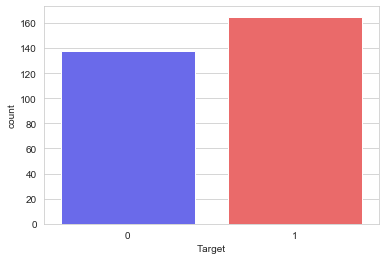

In [108]:
sns.set_style('whitegrid')
sns.countplot(x='Target', data=df, palette='seismic')
plt.show()

In [29]:
NumNoDisease = len(df[df.Target == 0])
NumDisease = len(df[df.Target == 1])

print(' Percentage of people without heart disease: {:.2f}%'.format((NumNoDisease / (len(df.Target))*100)))
print(' Percentage of people suffering from heart disease: {:.2f}%'.format((NumDisease / len(df.Target)*100)))

 Percentage of people without heart disease: 45.54%
 Percentage of people suffering from heart disease: 54.46%


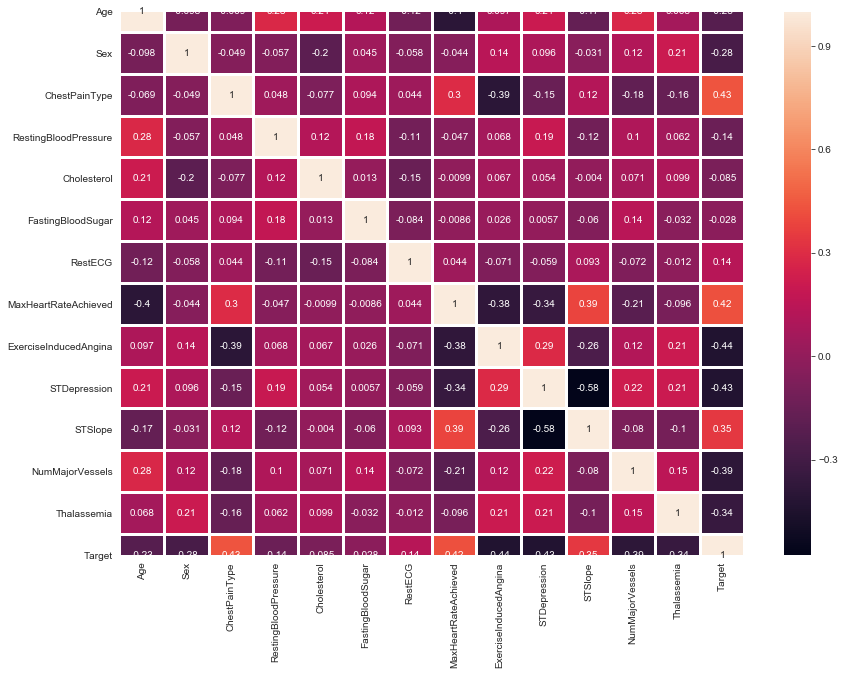

In [83]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(14,10))

g = sns.heatmap(df[top_corr_features].corr(), annot=True, linewidths=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF963FC48>,
      dtype=object)

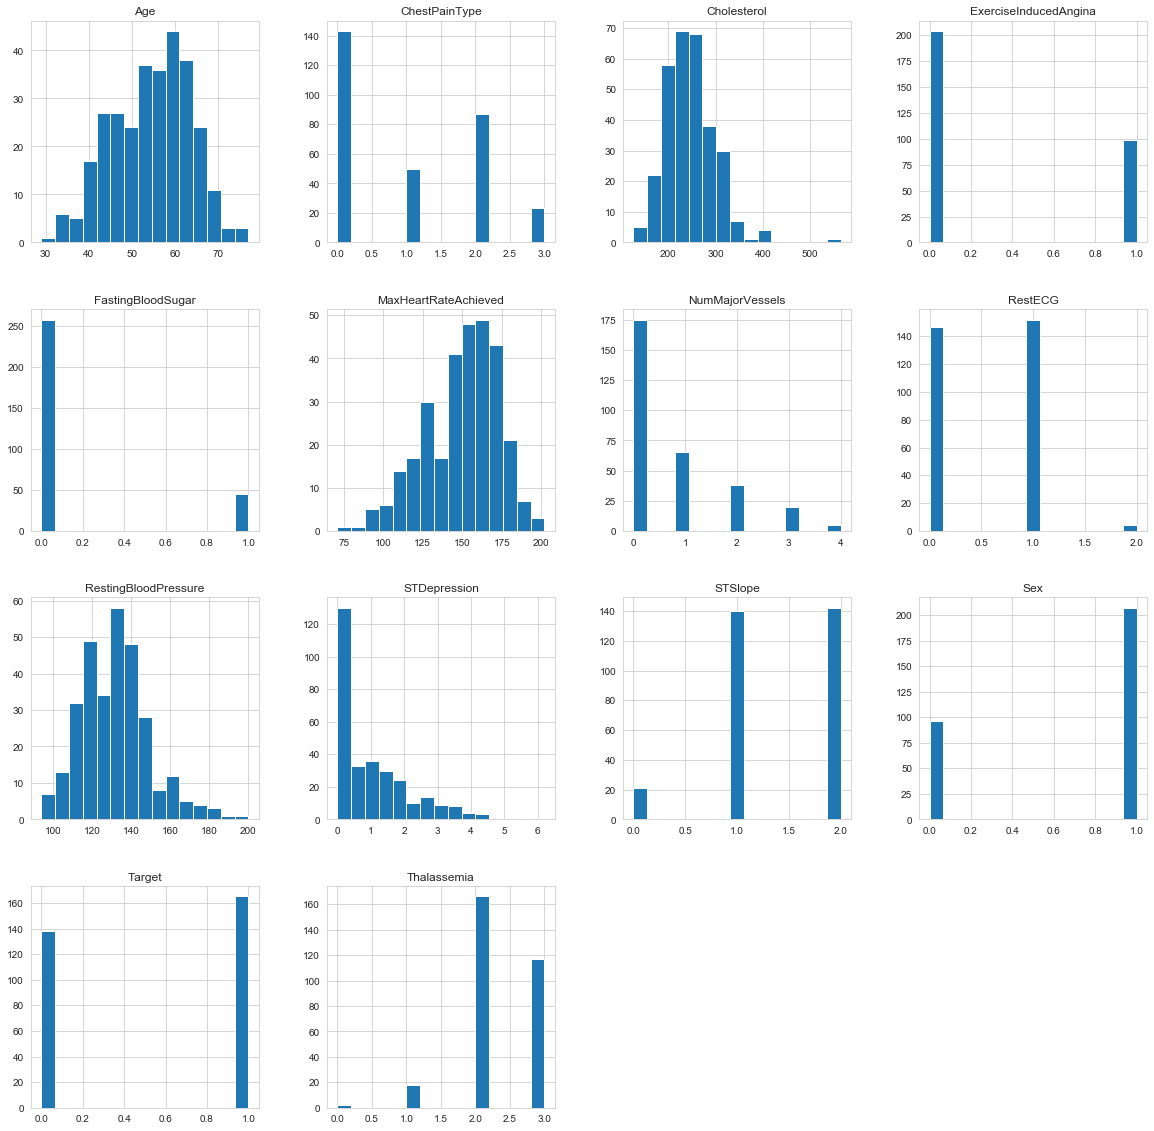

In [81]:
df.hist(bins=15, figsize=(20,20))

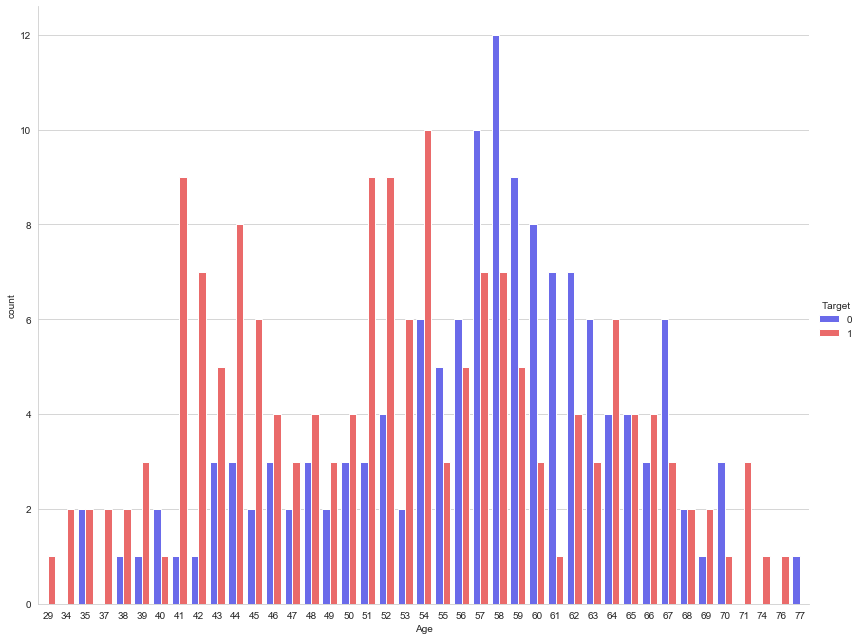

In [79]:
sns.factorplot('Age', kind='count', hue='Target', data=df, palette='seismic', height=9, aspect=1.25)

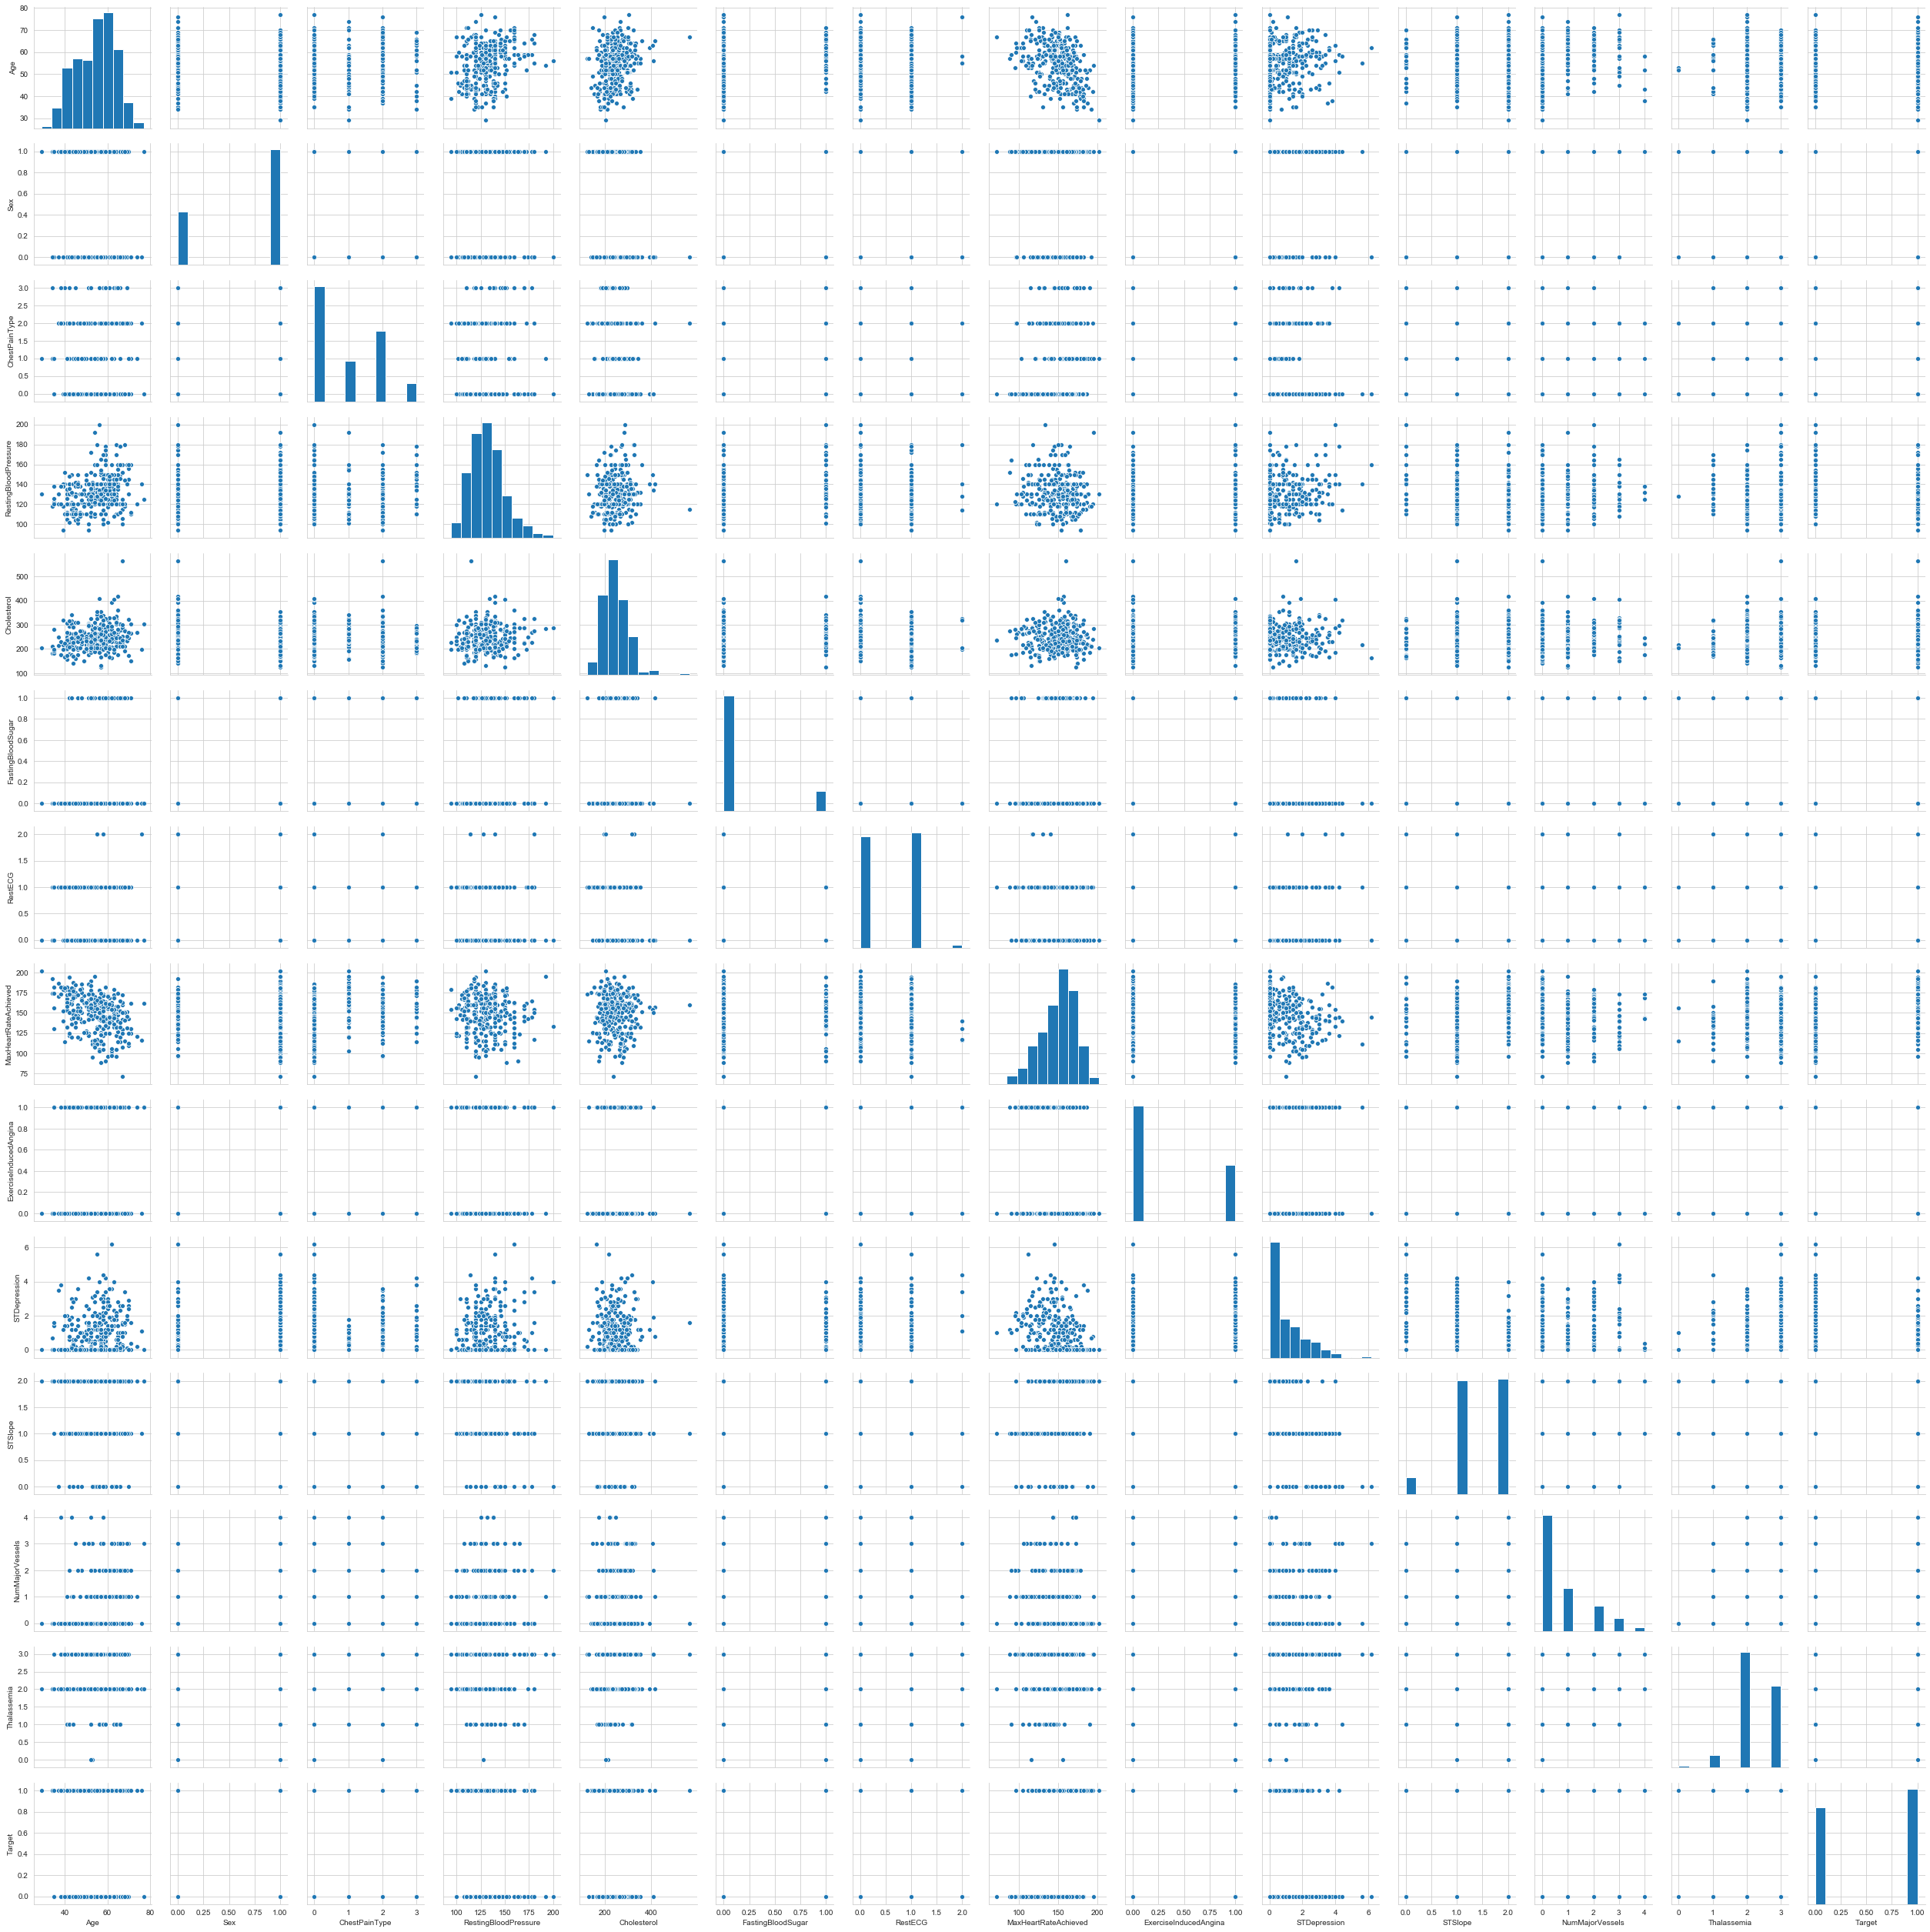

In [84]:
sns.pairplot(data=df)

In [47]:
dataset = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestECG', 'ExerciseInducedAngina',
                                     'STSlope', 'NumMajorVessels', 'Thalassemia'])

standardScaler = StandardScaler()

columns_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRateAchieved', 'STDepression']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [49]:
dataset.head()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,STDepression,Target,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,...,STSlope_2,NumMajorVessels_0,NumMajorVessels_1,NumMajorVessels_2,NumMajorVessels_3,NumMajorVessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [53]:
y = dataset['Target']
x = dataset.drop(['Target'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [92]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train.T, y_train.T)

accuracy = rf.score(x_test.T, y_test.T)*100
print('Accuracy of Random Forest Algorithm: {:.2f}%'.format(accuracy))

Accuracy of Random Forest Algorithm: 88.52%
